### Polynomial Regression : Problem Solving and Implementation

Introduction to Polynomial Regression
Polynomial regression is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables.

In a curvilinear relationship, the value of the target variable changes in a non-uniform manner with respect to the predictor (s).

In Linear Regression, with a single predictor, we have the following equation:

linear regression equation

where,

     y = a + b1x + b2x^2 +....+ bnx^n

      Y is the target,

      x is the predictor,

      a is the bias,

      and b1 is the weight in the regression equation
This linear equation can be used to represent a linear relationship. But, in polynomial regression, we have a polynomial equation of degree n represented as:

polynomial regression equation

Here:

      a is the bias,

      b1, b2, …, bn are the weights in the equation of the polynomial regression,

      and n is the degree of the polynomial
The number of higher-order terms increases with the increasing value of n, and hence the equation becomes more complicated.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HeightWeightDataset.csv')
df.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [3]:
x = df.iloc[:, 0:1].values
y = df.iloc[:,1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =0)

In [5]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
model = LinReg.fit(x_train,y_train)

In [6]:
model.predict([[10]])

array([128.52246403])

In [7]:
model.score(x_train,y_train)

0.9033447034302388

### Visualize the Linear Regression Result

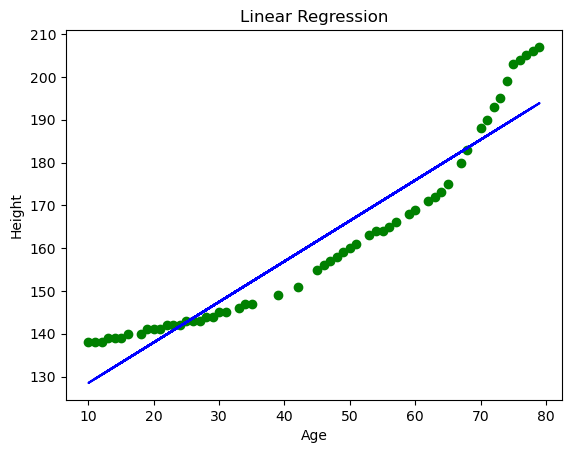

In [8]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,LinReg.predict(x_train),color='blue')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

### Add polynomial Term to the Equation and Model

In [9]:
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree = 2) 
x_polynom = polynom.fit_transform(x_train) 
  
x_polynom

array([[1.000e+00, 6.500e+01, 4.225e+03],
       [1.000e+00, 7.900e+01, 6.241e+03],
       [1.000e+00, 7.200e+01, 5.184e+03],
       [1.000e+00, 5.300e+01, 2.809e+03],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 7.500e+01, 5.625e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 5.100e+01, 2.601e+03],
       [1.000e+00, 5.900e+01, 3.481e+03],
       [1.000e+00, 6.300e+01, 3.969e+03],
       [1.000e+00, 6.700e+01, 4.489e+03],
       [1.000e+00, 4.200e+01, 1.764e+03],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 7.800e+01, 6.084e+03],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 3.900e+01, 1.521e+03],
       [1.000e+00, 6.200e+01, 3.84

### Fit the Polynomial Regression Model

In [10]:
PolyReg = LinearRegression()
modell = PolyReg.fit(x_polynom,y_train)

### Visualise the Polynomial Regression Results

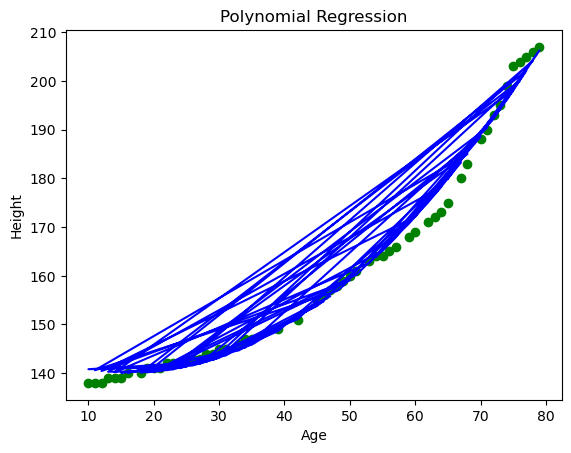

In [11]:
plt.scatter(x_train,y_train,color = 'green')
plt.plot(x_train,PolyReg.predict(polynom.fit_transform(x_train)),color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

### Predicted Height from test dataset w.r.t Simple Linear Regression

In [12]:
y_predict_slr = LinReg.predict(x_test)

#Model Evaluation using R-Square for Simple Linear Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test,y_predict_slr)
print('R-Square Error associated with Simple Linear Regression:', r_square)

R-Square Error associated with Simple Linear Regression: 0.8547153936823451


### Predicted Height from test dataset w.r.t Polynomial Regression

In [13]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(x_test))

#Model Evaluation using R-Square for Polynomial Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test,y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.9909864052059418


In [14]:
# Predicting Height based on Age using Linear Regression 
LinReg.predict([[54]])

array([170.18027175])

In [15]:
# Predicting Height based on Age using Polynomial Regression 
PolyReg.predict(polynom.fit_transform([[54]]))

array([163.88375385])